In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("./Group1_Telco_Churn_Final.csv")
df.columns
df_Y = pd.DataFrame()
df_Y['Churn'] = df['Churn']
df = df.drop(columns=['Churn', 'customerID'], axis=1)
df.columns
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   SeniorCitizen      7043 non-null   int64  
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   PhoneService       7043 non-null   object 
 6   MultipleLines      7043 non-null   object 
 7   InternetService    7043 non-null   object 
 8   OnlineSecurity     7043 non-null   object 
 9   OnlineBackup       7043 non-null   object 
 10  DeviceProtection   7043 non-null   object 
 11  TechSupport        7043 non-null   object 
 12  StreamingTV        7043 non-null   object 
 13  StreamingMovies    7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  PaperlessBilling   7043 non-null   object 
 16  PaymentMethod      7043 

In [6]:
df_after_cleaning = df.copy()
df_after_cleaning.info()
df_after_cleaning = df_after_cleaning.drop(columns=['SeniorCitizen','MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges'], axis=1)
# drop InternetService later
df_after_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   SeniorCitizen      7043 non-null   int64  
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   PhoneService       7043 non-null   object 
 6   MultipleLines      7043 non-null   object 
 7   InternetService    7043 non-null   object 
 8   OnlineSecurity     7043 non-null   object 
 9   OnlineBackup       7043 non-null   object 
 10  DeviceProtection   7043 non-null   object 
 11  TechSupport        7043 non-null   object 
 12  StreamingTV        7043 non-null   object 
 13  StreamingMovies    7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  PaperlessBilling   7043 non-null   object 
 16  PaymentMethod      7043 

In [7]:

dummies_columns = [i for i in df_after_cleaning.columns if i not in ['tenure', 'MonthlyCharges', 'total_charges']]
df_after_cleaning = pd.get_dummies(df_after_cleaning, columns=dummies_columns, drop_first=True)
df_after_cleaning[['tenure', 'total_charges', 'MonthlyCharges']] = df_after_cleaning[['tenure', 'total_charges', 'MonthlyCharges']].apply(pd.to_numeric, errors='coerce')
#df_after_cleaning.to_csv("df_after_cleaning_final.csv")
df_after_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   total_charges                          7043 non-null   float64
 3   gender_Male                            7043 non-null   bool   
 4   Partner_Yes                            7043 non-null   bool   
 5   Dependents_Yes                         7043 non-null   bool   
 6   PhoneService_Yes                       7043 non-null   bool   
 7   InternetService_Fiber optic            7043 non-null   bool   
 8   InternetService_No                     7043 non-null   bool   
 9   Contract_One year                      7043 non-null   bool   
 10  Contract_Two year                      7043 non-null   bool   
 11  Pape

In [8]:
X = df_after_cleaning.values
Y = df_Y.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
Y_train = np.array(Y_train)

rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rfc_2 = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train_scaled, Y_train)
print("Test score:{rfc.score(X_test, Y_test)}")

Y_pred = rfc.predict(X_test_scaled)

print(f"Confusion matrix: \n{confusion_matrix(Y_test, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred)}")
print(f"Accuracy: \n{accuracy_score(Y_test, Y_pred)}")

# Feathure selection
sfm = SelectFromModel(rfc, threshold=0.2)
X_important = sfm.transform(X_train_scaled)
X_important

/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test score:{rfc.score(X_test, Y_test)}
Confusion matrix: 
[[2346  230]
 [ 509  437]]
Classification Report: 
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      2576
         Yes       0.66      0.46      0.54       946

    accuracy                           0.79      3522
   macro avg       0.74      0.69      0.70      3522
weighted avg       0.78      0.79      0.78      3522

Accuracy: 
0.7901760363429869


/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_base.py:102: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


array([], shape=(3521, 0), dtype=float64)

In [9]:
X_train_scaled

array([[ 0.5564774 ,  0.67552354,  0.74567505, ..., -0.51936881,
        -0.71586105, -0.55011518],
       [ 0.72005704,  1.45061092,  1.39780217, ..., -0.51936881,
         1.39691913, -0.55011518],
       [-1.28379354, -0.63006073, -0.98746278, ..., -0.51936881,
        -0.71586105,  1.81780114],
       ...,
       [-0.83394954, -1.42828504, -0.87198816, ..., -0.51936881,
         1.39691913, -0.55011518],
       [-0.83394954,  1.15974657, -0.4760309 , ..., -0.51936881,
         1.39691913, -0.55011518],
       [-0.2614208 , -1.47290628, -0.80500624, ...,  1.92541405,
        -0.71586105, -0.55011518]])

In [10]:
for i in range(len(rfc.feature_importances_)):
    print(i, sum(rfc.feature_importances_[:i]))
    if sum(rfc.feature_importances_[:i]) >= 0.6:
        break

0 0
1 0.15622342526198268
2 0.32173089496020435
3 0.4953831042225001
4 0.5219031513166564
5 0.5436730516352141
6 0.5653768877257632
7 0.5732963514439796
8 0.6191673365634979


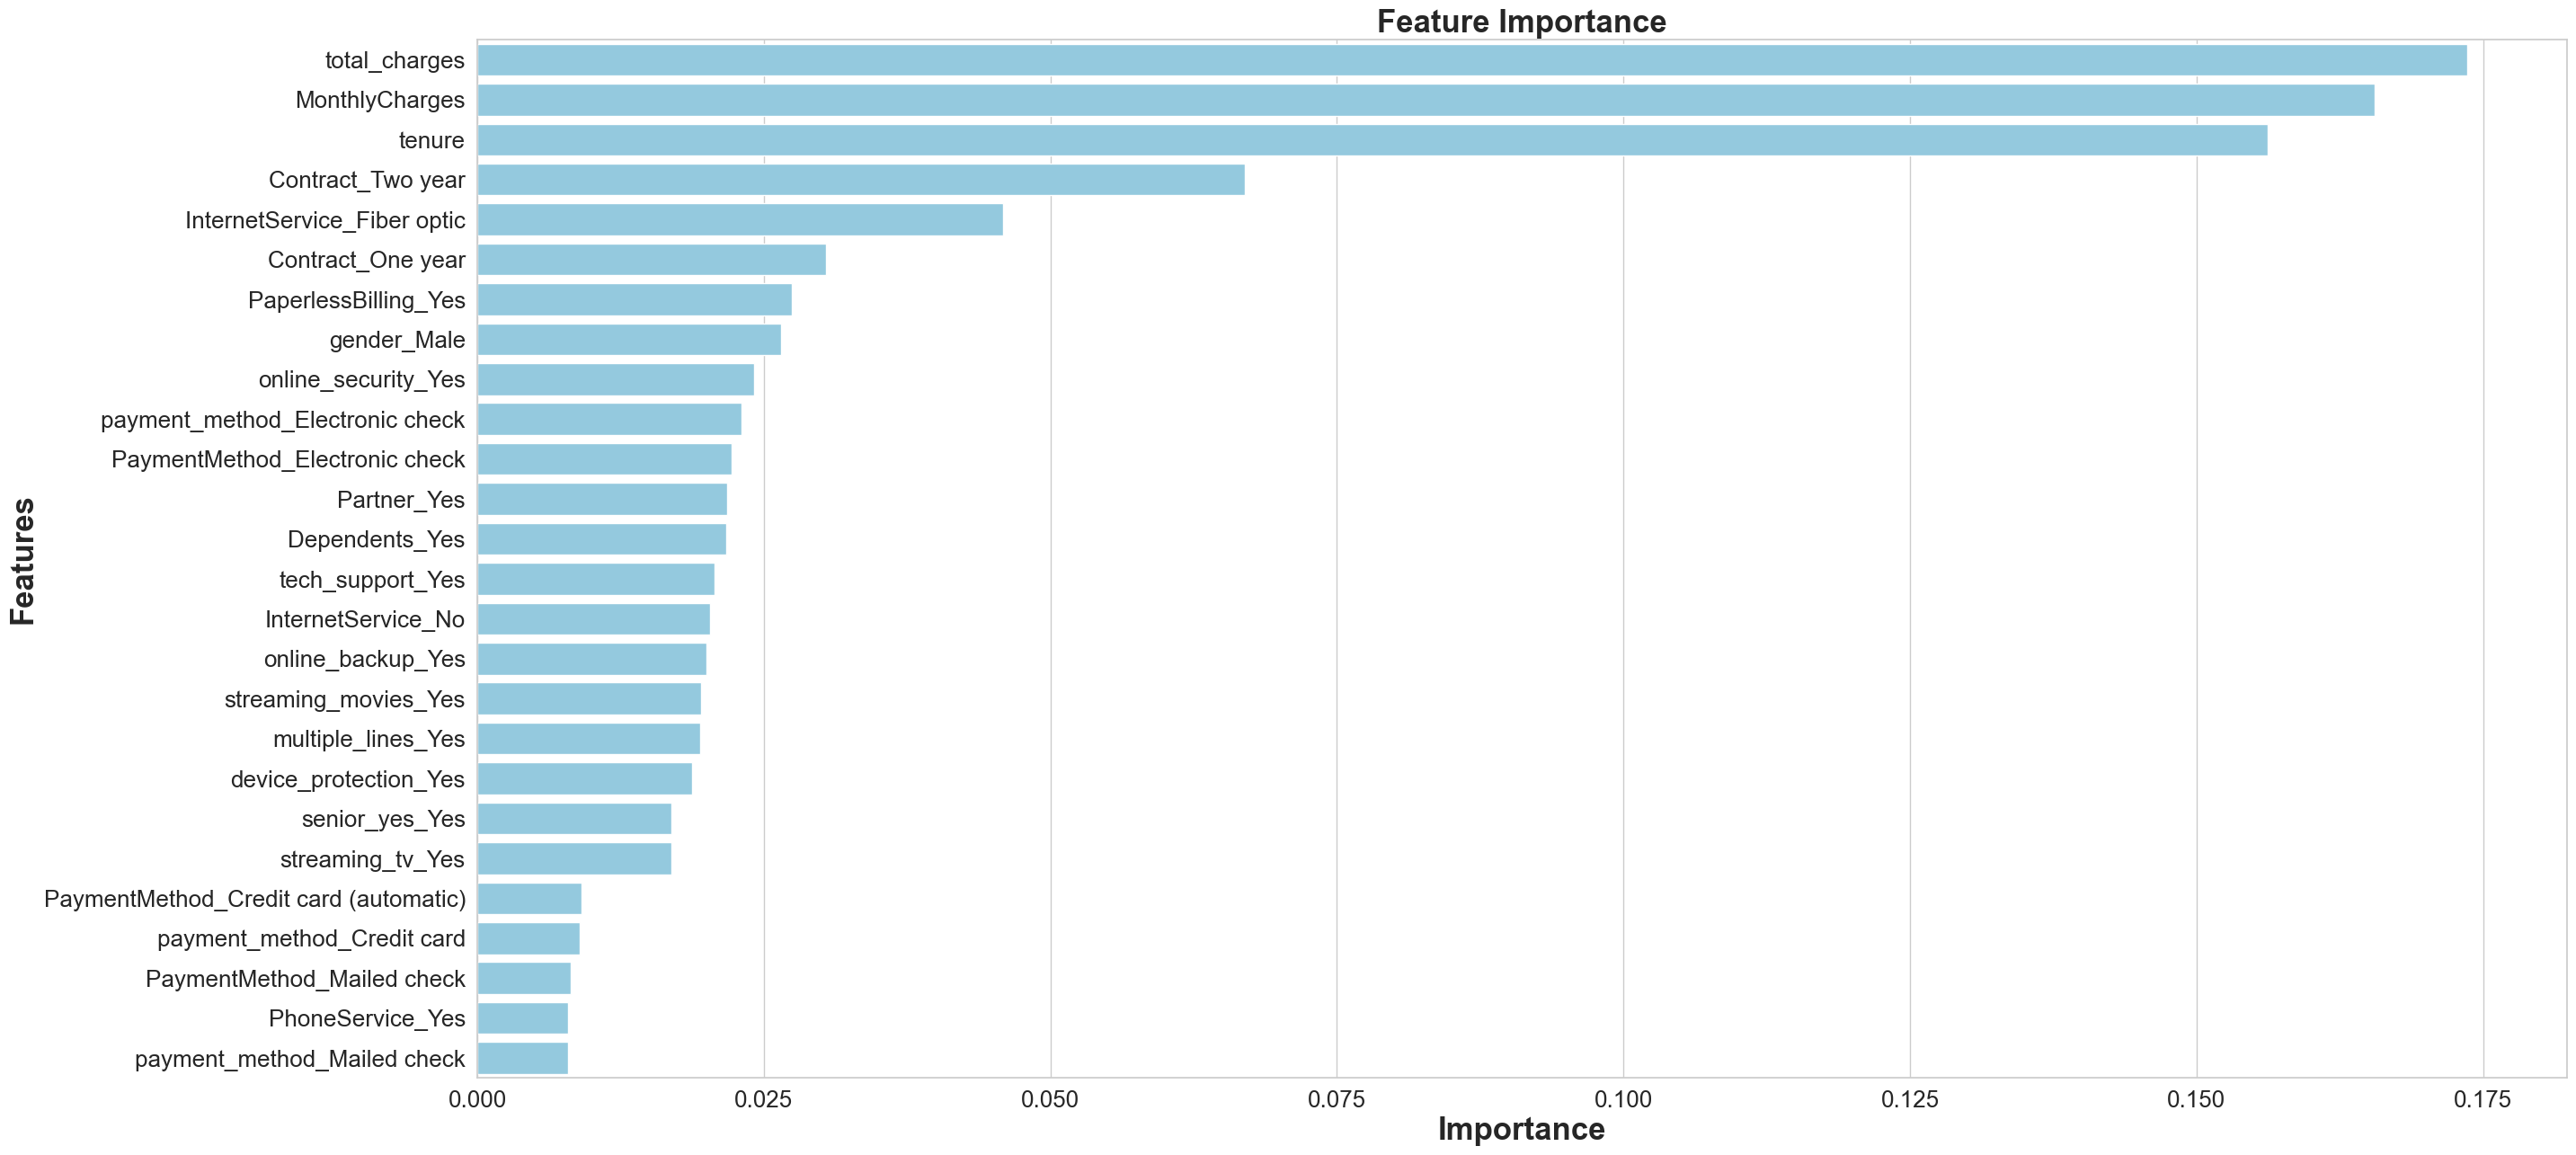

None

,Features,Gini-Importance
0,total_charges,0.173652
1,MonthlyCharges,0.165507
2,tenure,0.156223
3,Contract_Two year,0.066957
4,InternetService_Fiber optic,0.045871
5,Contract_One year,0.030448
6,PaperlessBilling_Yes,0.027409
7,gender_Male,0.026520
8,online_security_Yes,0.024145
9,payment_method_Electronic check,0.023047


In [11]:
feats = {}
for feature, importance in zip(df_after_cleaning.columns[:30], rfc.feature_importances_[:30]):
    feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
    importances = importances.sort_values(by='Gini-Importance', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_6994/3815587877.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances['Gini-Importance'], y=importances['Features'],


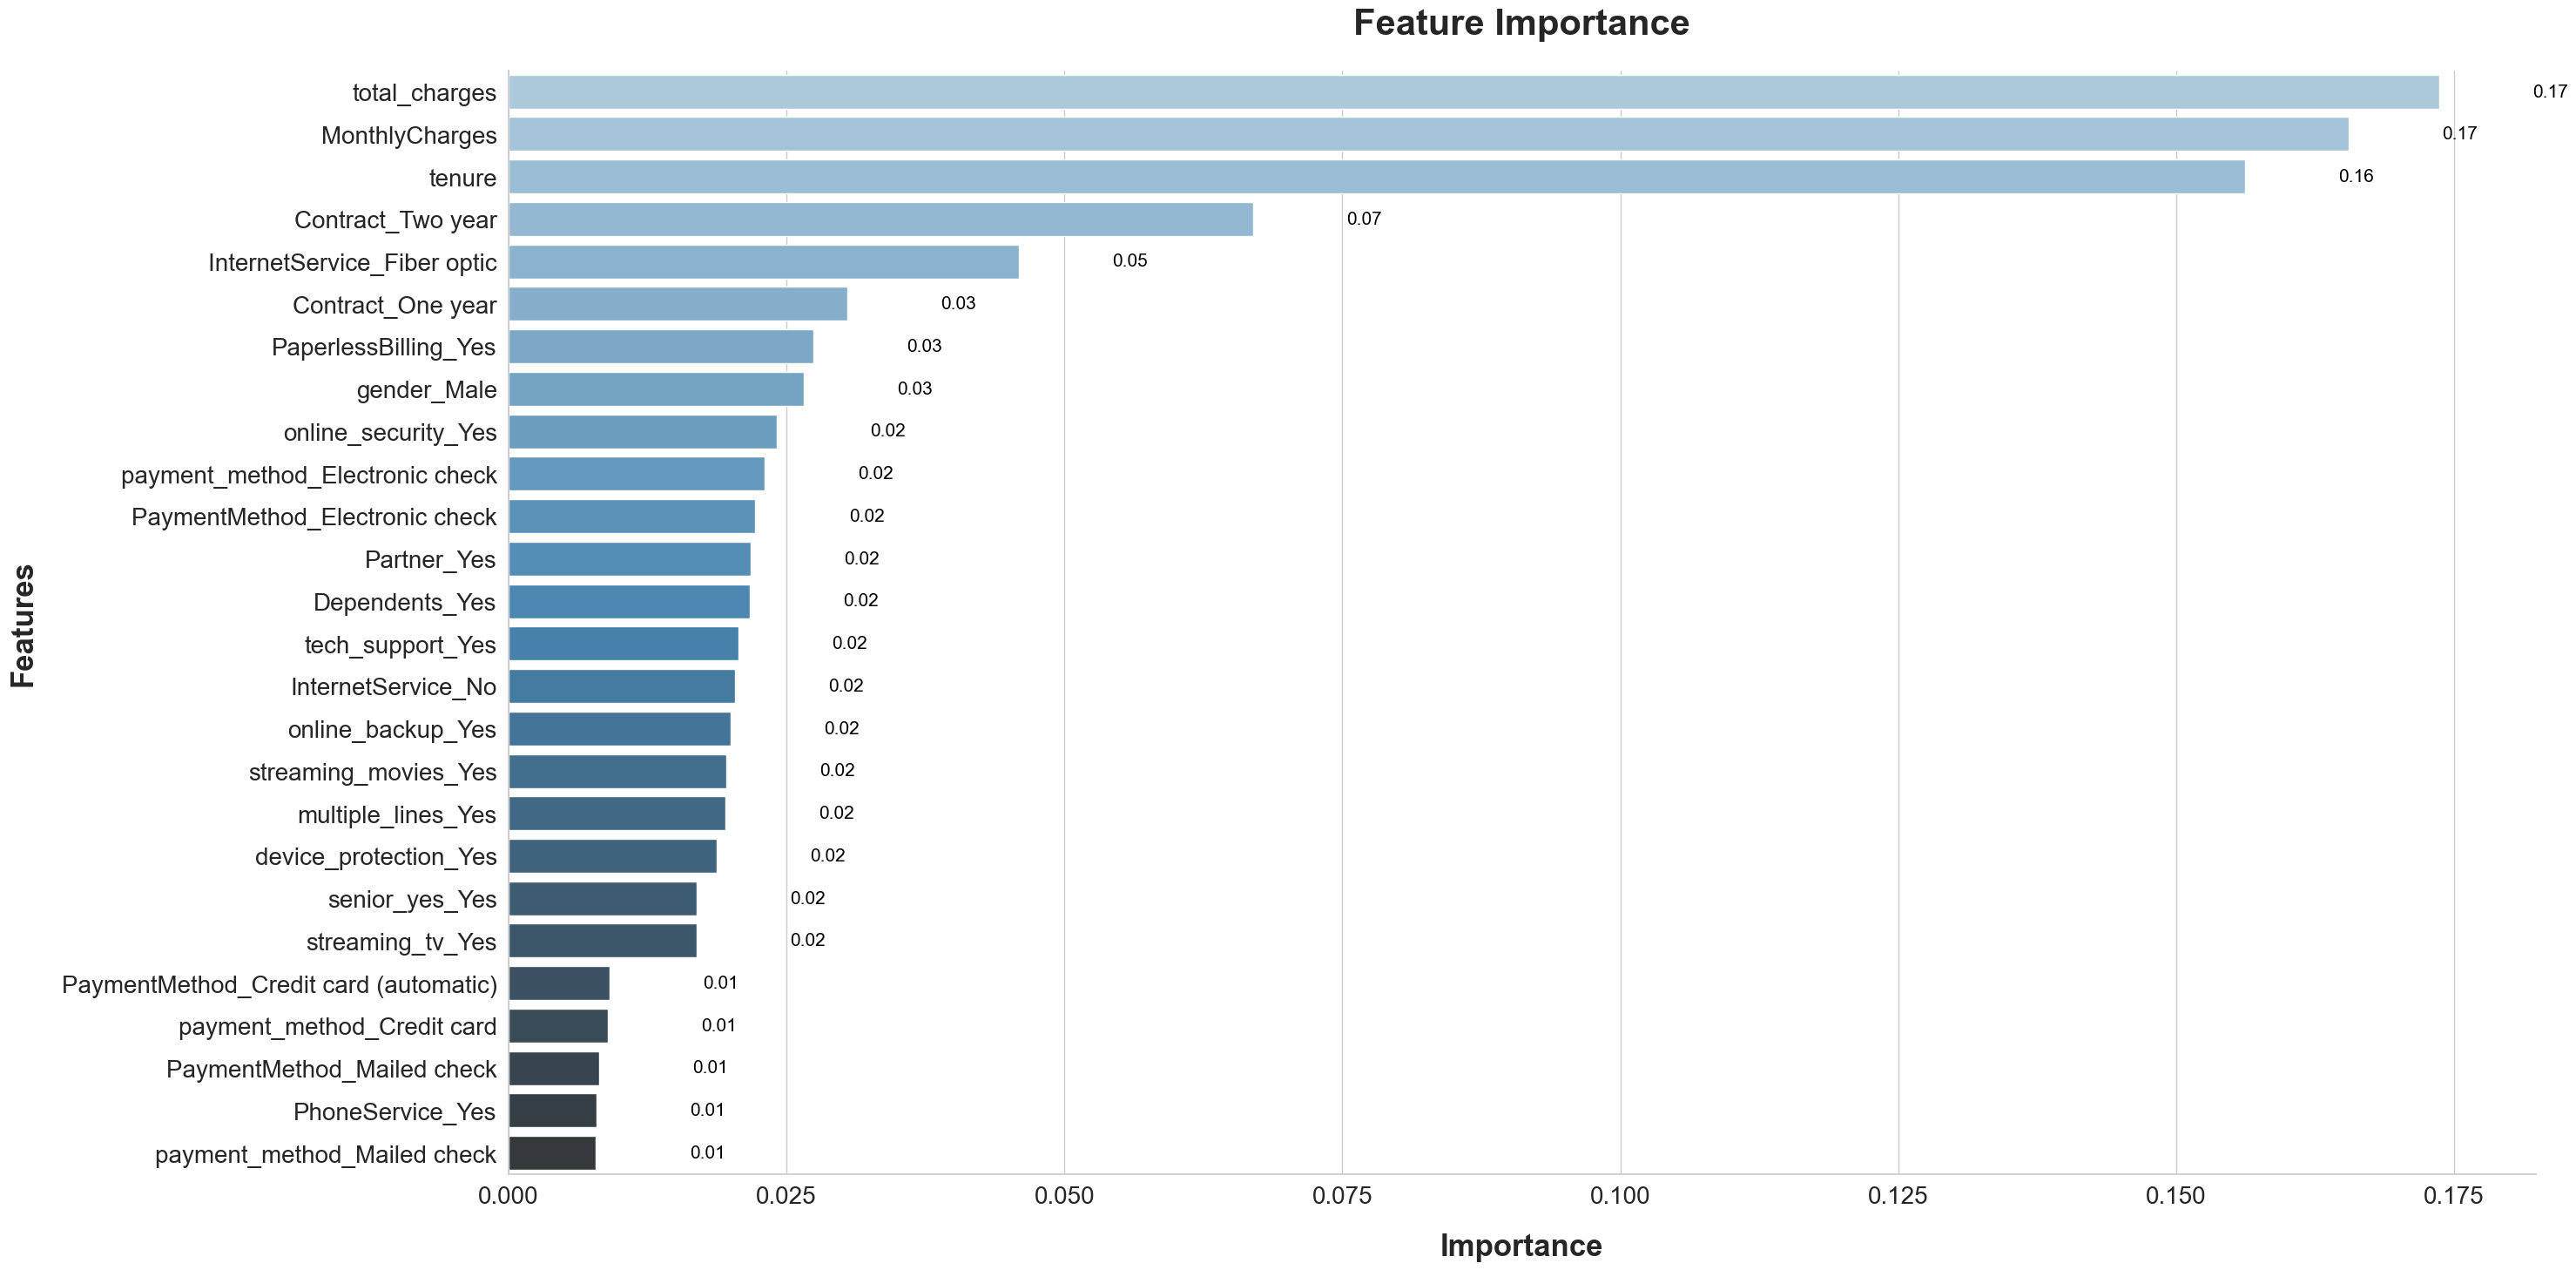

,Features,Gini-Importance
0,total_charges,0.173652
1,MonthlyCharges,0.165507
2,tenure,0.156223
3,Contract_Two year,0.066957
4,InternetService_Fiber optic,0.045871
5,Contract_One year,0.030448
6,PaperlessBilling_Yes,0.027409
7,gender_Male,0.026520
8,online_security_Yes,0.024145
9,payment_method_Electronic check,0.023047


In [12]:
# 设置字体和风格
sns.set(style="whitegrid", font_scale=1.7)

# 创建绘图
fig, ax = plt.subplots()
fig.set_size_inches(30, 15)

# 绘制条形图并使用更丰富的调色板
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], 
            data=importances, palette='Blues_d', ax=ax)

# 添加数据标签
for i in ax.patches:
    ax.text(i.get_width() + 0.01, i.get_y() + i.get_height() / 2, 
            f'{i.get_width():.2f}', ha='center', va='center', fontsize=15, color='black')

# 设置x轴、y轴标签及标题
ax.set_xlabel('Importance', fontsize=25, weight='bold', labelpad=20)
ax.set_ylabel('Features', fontsize=25, weight='bold', labelpad=20)
ax.set_title('Feature Importance', fontsize=30, weight='bold', pad=30)

# 去掉图的顶部和右侧边框
sns.despine(left=False, bottom=False)

# 调整x轴和y轴刻度的字体大小
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# 调整布局，避免图形与边界重叠
plt.tight_layout()

# 显示图形和数据
plt.show()
display(importances)

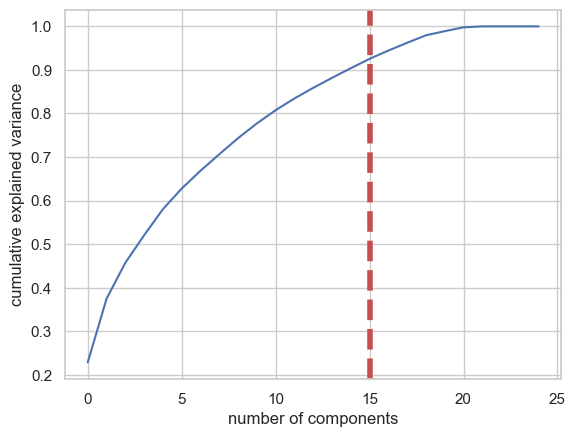

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.228380,0.228380
1,0.374454,0.146074
2,0.457017,0.082563
3,0.520257,0.063240
4,0.580166,0.059909


In [13]:
pca_test = PCA(n_components=25)
pca_test.fit(X_train_scaled)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle='--', x=15, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head())

In [14]:
pca = PCA(n_components=10)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

rfc_pca = RandomForestClassifier()
rfc_pca.fit(X_train_scaled_pca, Y_train)
display(rfc_pca.score(X_train_scaled_pca, Y_train))
Y_pred_pca = rfc_pca.predict(X_test_scaled_pca)

print(f"Confusion matrix: \n{confusion_matrix(Y_test, Y_pred_pca)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred_pca)}")
print(f"Accuracy: \n{accuracy_score(Y_test, Y_pred_pca)}")

/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9985799488781596

Confusion matrix: 
[[2331  245]
 [ 530  416]]
Classification Report: 
              precision    recall  f1-score   support

          No       0.81      0.90      0.86      2576
         Yes       0.63      0.44      0.52       946

    accuracy                           0.78      3522
   macro avg       0.72      0.67      0.69      3522
weighted avg       0.76      0.78      0.77      3522

Accuracy: 
0.779954571266326


In [15]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc_2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, Y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': True}

In [16]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,700,2,2,log2,11,True,0.775635,1
1,700,12,2,sqrt,13,False,0.763707,2
2,400,23,2,sqrt,14,False,0.761152,3
3,700,23,12,sqrt,8,True,0.760018,4
4,1000,12,7,sqrt,10,True,0.760018,5
5,600,23,2,sqrt,15,False,0.759164,6
6,1000,44,2,sqrt,9,True,0.758882,7
7,300,28,7,log2,13,True,0.758881,8
8,800,28,12,sqrt,14,True,0.758597,9
9,200,12,18,log2,9,True,0.757179,10


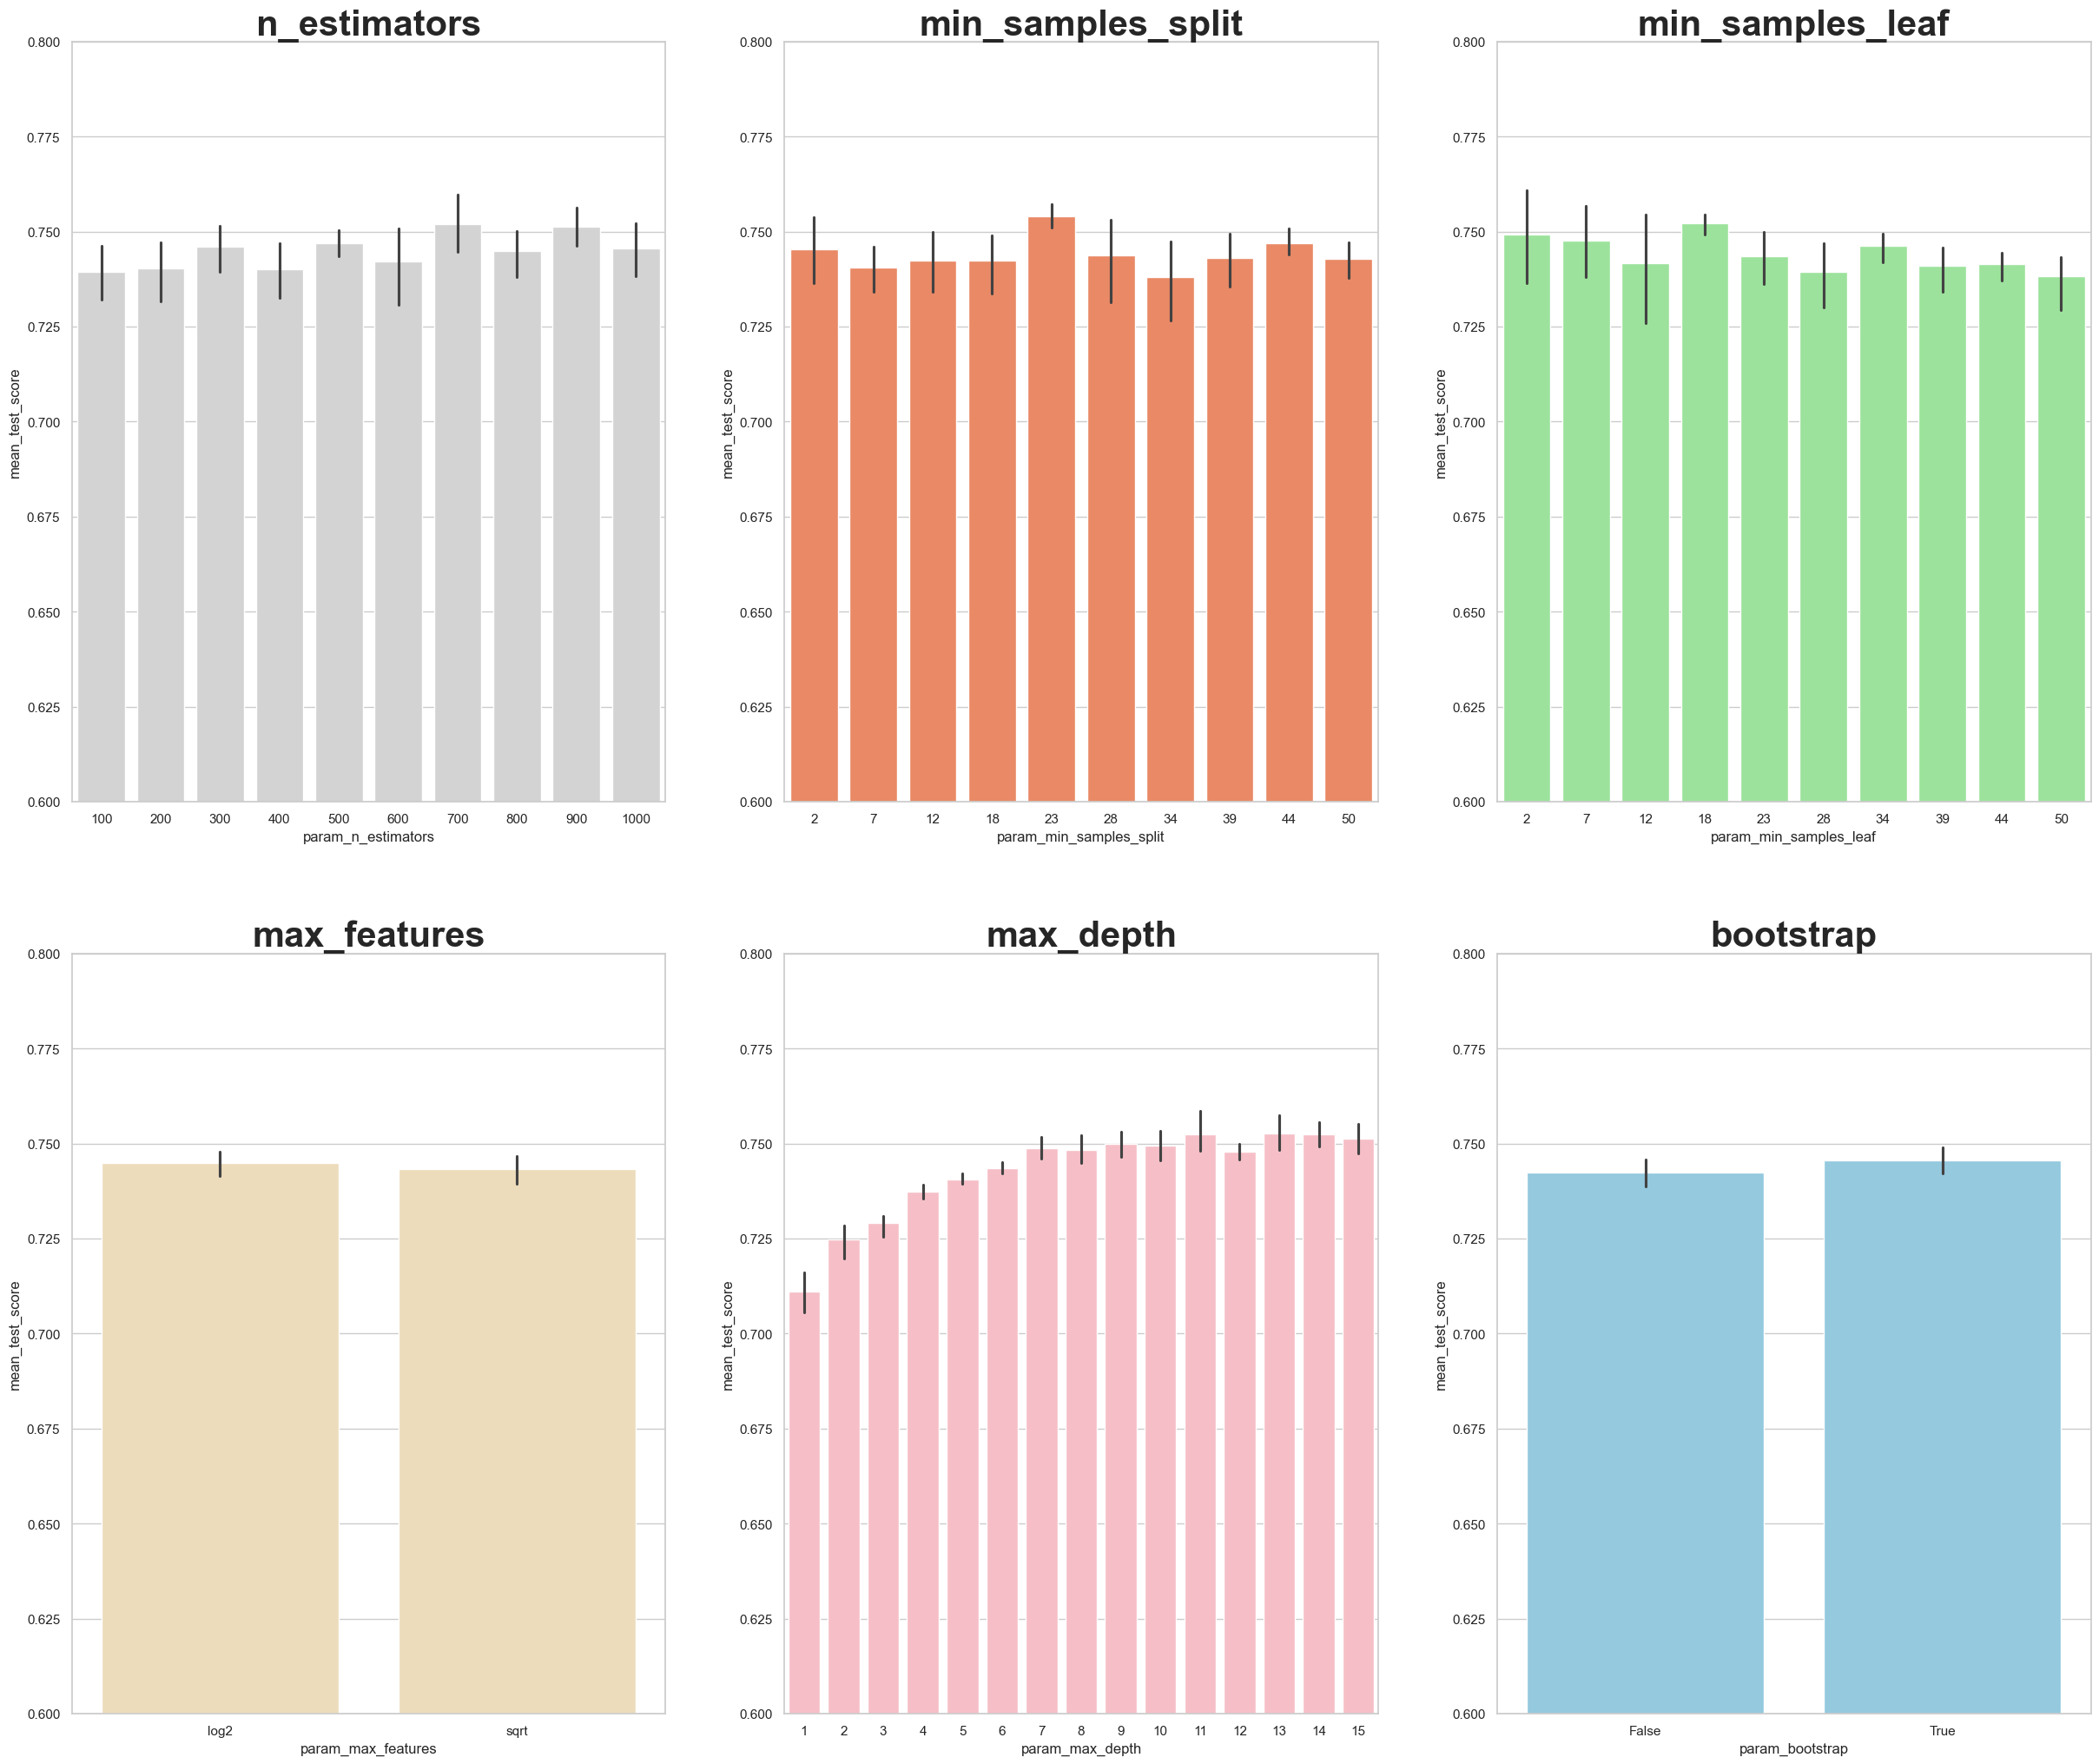

In [17]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.6,.8])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.6,.8])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.6,.8])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.6,.8])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.6,.8])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.6,.8])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [18]:
"""
{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': True}
 """
rfc_with_hyperparameter = RandomForestClassifier(
    n_estimators=700,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=11,
    bootstrap=True,
    class_weight='balanced'
)

rfc_with_hyperparameter.fit(X_train, Y_train)
print("Test score:{rfc_with_hyperparameter.score(X_test, Y_test)}")

Y_pred_2 = rfc_with_hyperparameter.predict(X_test)

print(f"Confusion matrix: \n{confusion_matrix(Y_test, Y_pred_2)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred_2)}")
print(f"Accuracy: \n{accuracy_score(Y_test, Y_pred_2)}")

/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test score:{rfc_with_hyperparameter.score(X_test, Y_test)}
Confusion matrix: 
[[2097  479]
 [ 262  684]]
Classification Report: 
              precision    recall  f1-score   support

          No       0.89      0.81      0.85      2576
         Yes       0.59      0.72      0.65       946

    accuracy                           0.79      3522
   macro avg       0.74      0.77      0.75      3522
weighted avg       0.81      0.79      0.80      3522

Accuracy: 
0.7896081771720613
